In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.duplicated().sum()

403

In [8]:
df=df.drop_duplicates()

In [9]:
df['v1'].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

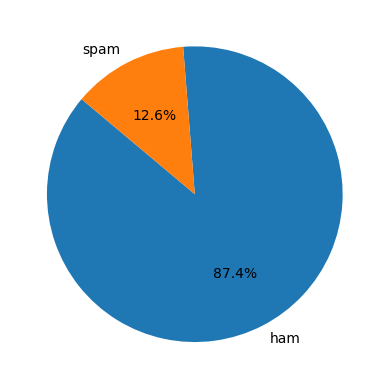

In [10]:
count=df['v1'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
plt.show()

In [11]:
x=df['v2']
y=df['v1']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(x_train)
X_test_vec = vectorizer.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(X_train_vec, y_train)

LogisticRegression()

In [16]:
yhat_train_lreg=lreg.predict(X_train_vec)
yhat_test_lreg=lreg.predict(X_test_vec)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [18]:
print(classification_report(y_train, yhat_train_lreg))
print()
print(classification_report(y_test, yhat_test_lreg))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3620
        spam       1.00      0.99      0.99       515

    accuracy                           1.00      4135
   macro avg       1.00      0.99      1.00      4135
weighted avg       1.00      1.00      1.00      4135


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       896
        spam       0.98      0.87      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [19]:
print(confusion_matrix(y_train, yhat_train_lreg))
print()
print(confusion_matrix(y_test, yhat_test_lreg))

[[3620    0]
 [   7  508]]

[[894   2]
 [ 18 120]]


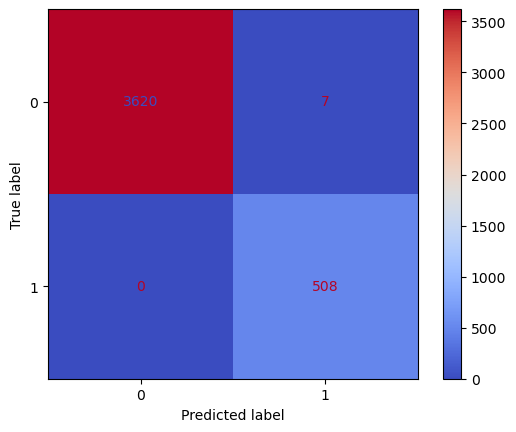

In [20]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_lreg, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

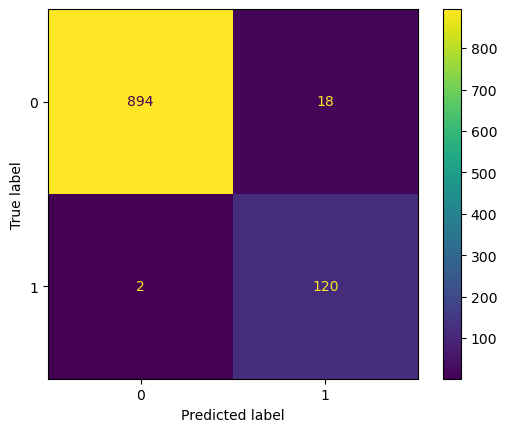

In [21]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_lreg, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

THE MODEL(LOGISTIC REGRESSION) HAS AN ACCURACY OF 98% OF SPAM PREDICTION